# A. Daily attendance of bike tracks
every row contains the number of bicycles on every track of the city(montreal), 
for every day of the year.
Can you infer anything from the attendence record?

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

1. Read 
2. Check head 
3. Check summary statistics 
4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'
5. Check index , explore weekday attributes 
6. Get sum of all attendance as a function of the weekday
7. Display this in figure , what is the inference?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

In [6]:
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)
df.head()
df.index
df.columns
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


<AxesSubplot:xlabel='Date'>

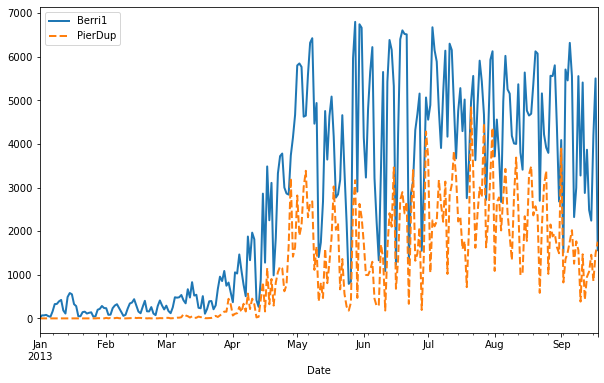

In [7]:
df[ ['Berri1', 'PierDup'] ].plot(figsize=(10,6), style=['-', '--'], lw=2)

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


(0.0, 6.3)

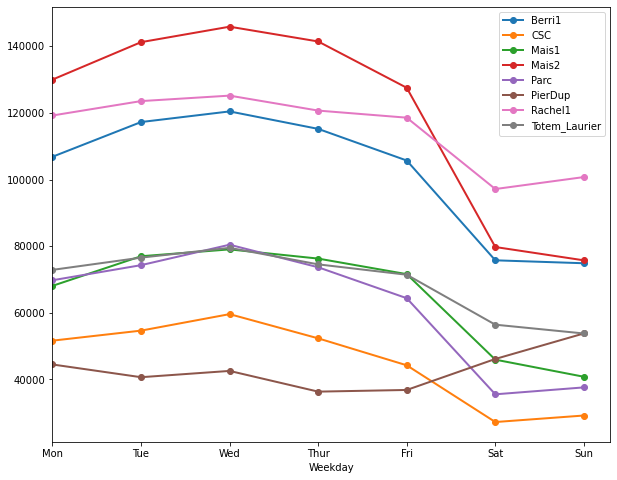

In [17]:
df_week = df.groupby(df.index.weekday).sum()
df_week.head() #Monday=0, Sunday=6.
fig, ax = plt.subplots(1,1, figsize=(10,8))
df_week.plot(style='-o', lw=2, ax=ax)
ax.set_xlabel('Weekday')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur','Fri', 'Sat', 'Sun'])
ax.set_xlim(0)

In [13]:
df_week


,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
0,106826,51646,68087,129982,69767,44500,119211,72883
1,117244,54656,76974,141217,74299,40679,123533,76559
2,120434,59604,79033,145860,80437,42564,125173,79501
3,115193,52340,76273,141424,73668,36349,120684,74540
4,105701,44252,71605,127526,64385,36850,118556,71426
5,75754,27226,45947,79743,35544,46149,97143,56438
6,74873,29181,40812,75746,37620,53812,100735,53798


# B. Titanic

https://www.kaggle.com/c/titanic/data

Database of whether somebody survived or not

Can you infer who has survived ?

1. Load the data
2. Which gender survived more 
3. Does it depend on pclass?
4. can we see % of survival of each gender and pclass 
What is your inference? 

In [18]:
#1
tt = pd.read_csv('data/titanic_train.csv')


In [21]:
tt.head()
tt.groupby('sex').survived.value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: survived, dtype: int64

In [28]:
tt.groupby(['sex', 'pclass']).survived.value_counts()
tt.groupby([ 'pclass', 'sex']).survived.value_counts()

pd.crosstab([tt.pclass, tt.sex], tt.survived)

id = pd.crosstab([tt.pclass, tt.sex], tt.survived)
id.sum(axis=1) # in Sum axis means which axis varies

id.div(id.sum(axis=1), axis=0) # axis means on what axis, div happens

survived              0         1
pclass sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

In [30]:
pd.crosstab([tt.pclass, tt.sex], tt.survived)

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47